# Set up

In [1]:
import numpy as np
import pandas as pd
import networkx as nx


from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.base import clone
from sklearn.metrics import roc_auc_score

import statsmodels.api as sm
from statsmodels.stats.multitest import fdrcorrection
from statsmodels.formula.api import ols

import sys
sys.path.append("..")
sys.path.append("../..")
from cluster_analysis import *
# from LOR_calculation import *

import warnings

### error

In [3]:
# ------------------ FIX ------------

from LOR_calculation import *

FileNotFoundError: [Errno 2] No such file or directory: '../data/presence_matrices/Campylobacter_coli_presence_absence_T.csv'

## Campylobacter coli

In [2]:
# ------------------ FIX ------------
# make a function to filter ourt based on user defined criteria

pan_df=get_cluster_pan_gene_class('../../pangenome-repo/Pangenome-Analysis-Workflow/codes/Campylobacter_coli/Campylobacter_coli_pangenome.csv')

pan_df = pan_df[pan_df['pan_gene_class']!='unique']
non_unique_genes = pan_df.index.tolist()
# non_unique_genes

In [20]:
species='Campylobacter_coli'; drug='ciprofloxacin'

# ------------------ FIX ------------
# exceptionally this way to C coli (presence matrix wasnt standardized to GxS)
X_df = pd.read_csv('../../data/presence_matrices/Campylobacter_coli_presence_absence.csv', index_col=0)
presence_df=X_df.T

y_df= pd.read_csv('../../data/phenotypes/Campylobacter_coli_ciprofloxacin.csv', index_col=0)
pheno_df=y_df

for gene in X_df.columns:
    
    if X_df[gene].std() == 0:
        X_df.drop(gene, axis=1, inplace=True)

X_df = X_df.sort_index()
y_df = y_df.sort_index()

y_indices=list(y_df.index)
X_indices=list(X_df.index)

intersection = [i for i in y_indices if i in X_indices]
y_df = y_df.loc[intersection]
X_df = X_df.loc[intersection]

X = X_df.values
y = y_df.values

labeled_matrix = pd.concat([X_df, y_df], axis=1)

log_odds_df = get_cluster_resistance_LOR(presence_df=presence_df, pheno_path='../../data/phenotypes/Campylobacter_coli_ciprofloxacin.csv')
log_odds_df
log_odds_dict = log_odds_df.to_dict()['log_odds']

/home/rayane/miniconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Acinetobacter baumannii

In [7]:
# import pandas as pd
# import numpy as np
# import networkx as nx
# import re
# import seaborn as sns

# genome_ids_file="../../pangenome-repo/Pangenome-Analysis-Workflow/test/A/Acinetobacter_baumannii_genome_ids.csv"
# clstr_freq_file="../../pangenome-repo/Pangenome-Analysis-Workflow/codes/Acinetobacter_baumannii/Acinetobacter_baumannii_cluster_frequencies.csv"
# clstr_file="../../pangenome-repo/Pangenome-Analysis-Workflow/codes/Acinetobacter_baumannii/Acinetobacter_baumannii.fasta.clstr"
# clstr_fasta_file="../../pangenome-repo/Pangenome-Analysis-Workflow/codes/Acinetobacter_baumannii/Acinetobacter_baumannii.fasta"

# samples_df = pd.read_csv(genome_ids_file, dtype=str)
# samples_list=samples_df['genome.genome_ids'].tolist()

# clstr_freq_df=pd.read_csv(clstr_freq_file, index_col=1)
# clstr_freq_df=clstr_freq_df.drop(clstr_freq_df.columns[0], axis=1)
# clstr_list=clstr_freq_df.index.tolist()

# df = pd.DataFrame(index=samples_list, columns=clstr_list)
# df = df.fillna(0)

# with open(clstr_file) as f:
#     for line in f:
#         if line.startswith(">Cluster"):
#             #if its a > line get the cluster id and start counting its occurences in which samples by saving it to the local var
#             cluster_id=line[1:].strip()
#         else:
#             #else its a line designating the sample genome, one that the last cluster_id is present in
#             # get the 1st group matching here \d\t\d+aa, >fig\|([\d\.\d]+).+

#             genome_id=re.match(r"\d+\t\d+aa, >fig\|([\d\.\d]+).+", line).group(1)
#             genome_id=genome_id[:-1]  #removing the trailing .
#             df.loc[genome_id, cluster_id]+=1

# df = df.T
# df.to_csv('../../data/presence_matrices/Acinetobacter_baumannii_GxS.csv')

In [4]:
pan_df=get_cluster_pan_gene_class('../../pangenome-repo/Pangenome-Analysis-Workflow/codes/Acinetobacter_baumannii/Acinetobacter_baumannii_pangenome.csv')
clstr_df= get_cluster_representatives('../../pangenome-repo/Pangenome-Analysis-Workflow/codes/Acinetobacter_baumannii/Acinetobacter_baumannii.fasta.clstr')
_product_df = get_representative_products('../../pangenome-repo/Pangenome-Analysis-Workflow/codes/Acinetobacter_baumannii/Acinetobacter_baumannii.fasta')
product_df = combine_cluster_product(clstr_df, _product_df)
# pan_df = pan_df[pan_df['pan_gene_class']!='unique']
# non_unique_genes = pan_df.index.tolist()

In [17]:
clstr_df= get_cluster_representatives('../../pangenome-repo/Pangenome-Analysis-Workflow/codes/Campylobacter_coli/Campylobacter_coli.fasta.clstr')
_product_df=get_representative_products('../../pangenome-repo/Pangenome-Analysis-Workflow/codes/Campylobacter_coli/Campylobacter_coli.fasta')
product_df = combine_cluster_product(clstr_df, _product_df)

nan_count = product_df['product_name'].isna().sum()
nan_count

0

In [22]:
species='Acinetobacter_baumannii'; drug='amikacin'

presence_df = pd.read_csv('../../data/presence_matrices/Acinetobacter_baumannii_GxS.csv', index_col=0); 
X_df=presence_df.T
X_df.index = X_df.index.astype('float')
# X_df.index = X_df.index.astype('object')

# -- remove from X_df all genes that are not in the non_unique_genes
X_df = X_df[non_unique_genes]

pheno_df= pd.read_csv('../../data/phenotypes/Acinetobacter_baumannii_amikacin.csv', index_col=0)
y_df=pheno_df
y_df.index = y_df.index.astype('float')

for gene in X_df.columns:
    
    if X_df[gene].std() == 0:
        X_df.drop(gene, axis=1, inplace=True)

X_df = X_df.sort_index()
y_df = y_df.sort_index()


y_indices=list(y_df.index)
X_indices=list(X_df.index)

intersection = [i for i in y_indices if i in X_indices]
y_df = y_df.loc[intersection]
X_df = X_df.loc[intersection]

# -- removing duplicate rows? --          to check th e nature of duplicates it could be an error through type conversion
X_df = X_df.loc[~X_df.index.duplicated(keep='first')]

X = X_df.values
y = y_df.values

labeled_matrix = pd.concat([X_df, y_df], axis=1)

In [ ]:
log_odds= get_cluster_resistance_LOR(presence_df, pheno_df)
log_oddds_dict = create_dicts(log_odds)['log_odds']

# Model

## SVM

In [21]:
n_models = 200
t = 0.2 # -- UNSIGNED

models=[]
for i in range(n_models):
    X_boot, y_boot = resample(X, y, random_state=i)
    model=SGDClassifier(loss='hinge', penalty= None, max_iter=1000, tol=1e-3)
    model.fit(X_boot, y_boot.ravel())
    models.append(model)

weights=np.zeros((n_models, X.shape[1]))
for i in range(n_models):
    weights[i]=models[i].coef_
weights_df = pd.DataFrame(weights, columns=X_df.columns)

corr_SVM = weights_df.corr()

G=nx.Graph()

for i in range(X.shape[1]):
    for j in range(i+1, X.shape[1]):
        node_i=X_df.columns[i]; node_j=X_df.columns[j]
        correlation = corr_SVM.iloc[i, j]
        if correlation > t:
            G.add_edge(node_i, node_j, weight=correlation)

# G=set_cluster_attributes(G)
nx.set_node_attributes(G, log_odds_dict, 'log_odds')

nx.write_graphml(G, f'../../data/graphs-6/{n_models}_randomized_SVM_{t}signed_corr_{species}_{drug}.graphml')

edges_list = list(G.edges)
edge_weights = [G[u][v]['weight'] for u, v in edges_list]
print(f"E: {len(edges_list)}, V: {G.number_of_nodes()} when {n_models} models are used, with corr threshold={t}; species={species}, drug={drug}.")

E: 601752, V: 6927 when 200 models are used, with corr threshold=0.2; species=Campylobacter_coli, drug=ciprofloxacin.


### ANOVA

In [22]:
n_models = 200
t = 0.2 # -- UNSIGNED

models=[]
for i in range(n_models):
    X_boot, y_boot = resample(X, y, random_state=i)
    model=SGDClassifier(loss='hinge', penalty= None, max_iter=1000, tol=1e-3)
    model.fit(X_boot, y_boot.ravel())
    models.append(model)

weights=np.zeros((n_models, X.shape[1]))
for i in range(n_models):
    weights[i]=models[i].coef_
weights_df = pd.DataFrame(weights, columns=X_df.columns)

corr_SVM = weights_df.corr()

G=nx.Graph()

for i in range(X.shape[1]):
    for j in range(i+1, X.shape[1]):
        node_i=X_df.columns[i]; node_j=X_df.columns[j]
        correlation = corr_SVM.iloc[i, j]
        if correlation > t:
            G.add_edge(node_i, node_j, weight=correlation)

# G=set_cluster_attributes(G)
nx.set_node_attributes(G, log_odds_dict, 'log_odds')

nx.write_graphml(G, f'../../data/graphs-6/{n_models}_randomized_SVM_{t}signed_corr_{species}_{drug}.graphml')

edges_list = list(G.edges)
edge_weights = [G[u][v]['weight'] for u, v in edges_list]
print(f"E: {len(edges_list)}, V: {G.number_of_nodes()} when {n_models} models are used, with corr threshold={t}; species={species}, drug={drug}.")

save_edges=[]

edges_list_2=[(i.replace(' ', '_'), j.replace(' ', '_')) for i, j in edges_list]
labeled_matrix_2 = labeled_matrix.rename(columns={col: col.replace(' ', '_') for col in labeled_matrix.columns})
p_values={}

count_nan=0
save_nan_testing=[]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for pair in edges_list_2:
        a, b = pair
        # print(" --- looking into the interaction between", a, "and", b)
        formula = f'SIR ~ {a} + {b} + {a}:{b}'
        model = ols(formula, data=labeled_matrix_2).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        if not np.isnan(anova_table['PR(>F)'][2]):
            p_values[anova_table.index[2]]=anova_table['PR(>F)'][2]
        else:
            save_nan_testing.append(pair)
            count_nan+=1
        
print(f"{count_nan} interactions have nan p-values - removed")

# mst correction - using fdr

gene_gene_pair = list(p_values.keys())
p_values_list = list(p_values.values())

reject, corrected_p_values= fdrcorrection(p_values_list)

results_df = pd.DataFrame({
    'gene_gene': gene_gene_pair,
    'p-value': p_values_list,
    'corr_p_value': corrected_p_values,
    'reject_H0': reject
})

count_rejected=0
for i in reject:
    if i:
        count_rejected+=1

print(f"Number of rejected H0: {count_rejected} out of {len(reject)}")

new_edge_pairs=results_df[results_df['reject_H0'] == True]['gene_gene'].values

edge_pairs_tuples = [tuple(pair.split(':')) for pair in new_edge_pairs]

edge_pairs_tuples
edge_pairs_tuples=[(i.replace('_', ' '), j.replace('_', ' ')) for i, j in edge_pairs_tuples]

G_sig=nx.Graph()
G_sig.add_edges_from(edge_pairs_tuples)

nx.set_node_attributes(G_sig, log_odds_dict, 'log_odds')

# G_sig=set_cluster_attributes(G_sig)

nx.write_graphml(G_sig, f'../../data/graphs-6/corrected_{n_models}_randomized_SVM_{t}signed_corr_{species}_{drug}.graphml')

print(f"final number of nodes: {G_sig.number_of_nodes()}, final number of edges: {G_sig.number_of_edges()}")

G_sig=nx.read_graphml(f'../../data/graphs-6/corrected_{n_models}_randomized_SVM_{t}signed_corr_{species}_{drug}.graphml')
G_sig = set_cluster_attributes(G_sig, pipeline_output='../../pangenome-repo/Pangenome-Analysis-Workflow/codes/Acinetobacter_baumannii')

nx.write_graphml(G_sig,f'../../data/graphs-6/corrected_{n_models}_randomized_SVM_{t}signed_corr_{species}_{drug}.graphml')

55079 interactions have nan p-values - removed
Number of rejected H0: 7962 out of 546673
final number of nodes: 1238, final number of edges: 7962


In [16]:
G_sig.nodes(data=True)

NodeDataView({'Cluster 1': {'gene_representative': '470.4901.peg.38', 'pan_gene_class': 'unique', 'product_name': nan, 'frequency': 1, 'log_odds': -1.2202728010709136}, 'Cluster 916': {'gene_representative': '470.10320.peg.2', 'pan_gene_class': 'unique', 'product_name': nan, 'frequency': 2, 'log_odds': 1.1402997094647938}, 'Cluster 172': {'gene_representative': '1310797.3.peg.3', 'pan_gene_class': 'unique', 'product_name': nan, 'frequency': 33, 'log_odds': -0.7675219735450629}, 'Cluster 1257': {'gene_representative': '1310580.3.peg.2', 'pan_gene_class': 'unique', 'product_name': nan, 'frequency': 1, 'log_odds': -1.071850437111586}, 'Cluster 2213': {'gene_representative': '1217640.3.peg.2', 'pan_gene_class': 'unique', 'product_name': nan, 'frequency': 13, 'log_odds': -0.5430776676031785}, 'Cluster 4797': {'gene_representative': '470.3996.peg.37', 'pan_gene_class': 'core', 'product_name': nan, 'frequency': 1324, 'log_odds': -0.2818770786910726}, 'Cluster 7383': {'gene_representative': '1

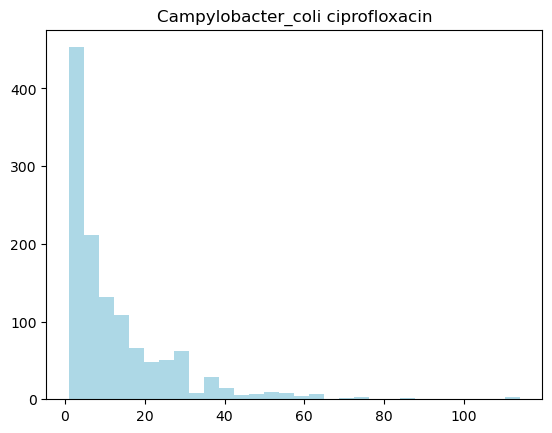

In [27]:
from network_analysis import *

plot_degree_distribution(G_sig, species+" "+drug)

### LOR of R co-occurence

In [ ]:
LOR_df = compute_cooccurence_LOR(gene_pairs=edges_list)
#try it on threshold 0.5